In [54]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Doctor.csv')
df.describe()
print(df)
df.describe()

     doctor  children  access  health
0         0         1    0.50   0.495
1         1         3    0.17   0.520
2         0         4    0.42  -1.227
3         0         2    0.33  -1.524
4        11         1    0.67   0.173
..      ...       ...     ...     ...
480       0         2    0.50  -0.421
481       0         2    0.36  -0.930
482       9         1    0.33  -1.066
483       0         2    0.33  -1.363
484       1         3    0.50  -0.099

[485 rows x 4 columns]


,doctor,children,access,health
count,485.000000,485.000000,485.000000,485.000000
mean,1.610309,2.263918,0.381175,-0.000041
std,3.346809,1.319136,0.186108,1.433520
min,0.000000,1.000000,0.000000,-1.524000
25%,0.000000,1.000000,0.250000,-1.066000
50%,1.000000,2.000000,0.350000,-0.421000
75%,2.000000,3.000000,0.500000,0.657000
max,48.000000,9.000000,0.920000,7.217000


DF is a dataframe containing :

doctor
the number of doctor visits

children
the number of children in the household

access
is a measure of access to health care

health
a measure of health status (larger positive numbers are associated with poorer health)

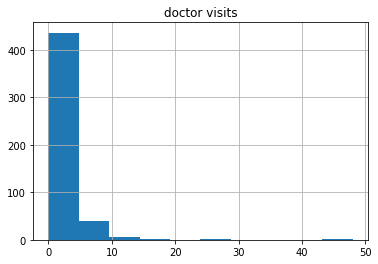

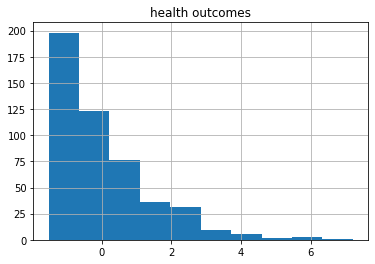

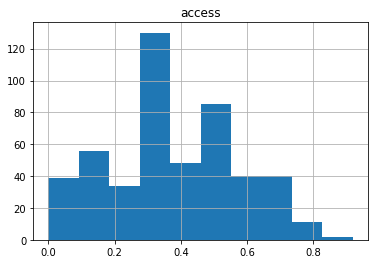

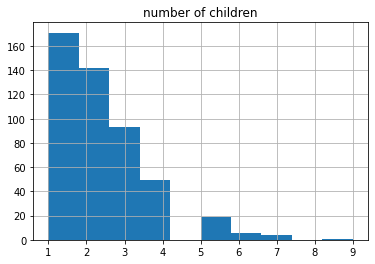

In [55]:
df['doctor'].hist()
plt.title('doctor visits')
plt.show()

df['health'].hist()
plt.title('health outcomes')
plt.show()

df['access'].hist()
plt.title('access')
plt.show()

df['children'].hist()
plt.title('number of children')
plt.show()

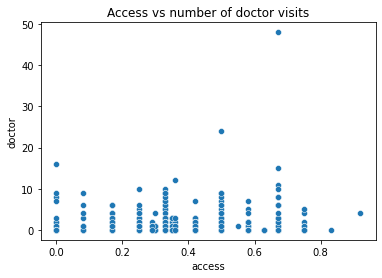

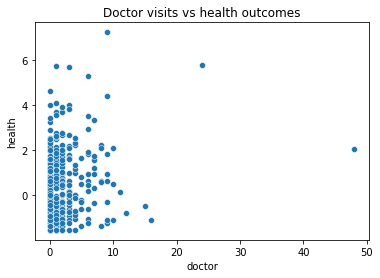

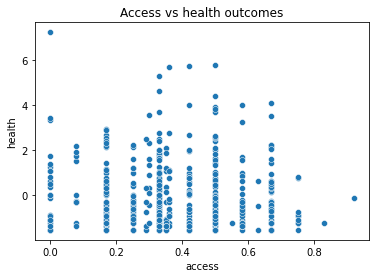

In [56]:
sns.scatterplot(x='access', y='doctor', data=df)
plt.title('Access vs number of doctor visits')
plt.show()

sns.scatterplot(x='doctor', y='health', data=df)
plt.title('Doctor visits vs health outcomes')
plt.show()

sns.scatterplot(x='access', y='health', data=df)
plt.title('Access vs health outcomes')
plt.show()

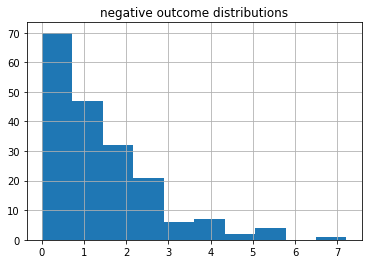

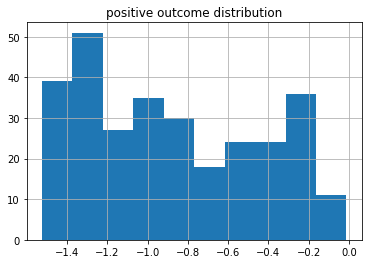

The proportion of positive outcomes is: 0.6082474226804123
The proportion of negative outcomes is: 0.3917525773195876


In [58]:
negative_outcomes = df[df['health'] > 0]
positive_outcomes = df[df['health'] <= 0]

negative_outcomes['health'].hist()
plt.title('negative outcome distributions')
plt.show()

positive_outcomes['health'].hist()
plt.title('positive outcome distribution')
plt.show()

positive_ratio = len(positive_outcomes)/len(df)
negative_ratio = len(negative_outcomes)/len(df)

print('The proportion of positive outcomes is:', positive_ratio)
print('The proportion of negative outcomes is:', negative_ratio)

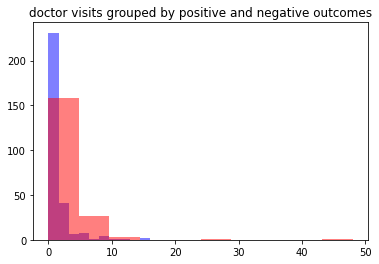

KruskalResult(statistic=36.39198166048924, pvalue=1.6136570861792243e-09)
(26.579106382311636, 2.529647137265307e-07, 1.0, array([[ 64,  84],
       [231, 106]], dtype=int64))


In [59]:
plt.hist(positive_outcomes['doctor'], alpha=0.5, color = 'blue')
plt.hist(negative_outcomes['doctor'], alpha=0.5, color = 'red')
plt.title('doctor visits grouped by positive and negative outcomes')
plt.show()
print(stats.kruskal(positive_outcomes['doctor'], negative_outcomes['doctor']))
print(stats.median_test(positive_outcomes['doctor'], negative_outcomes['doctor']))

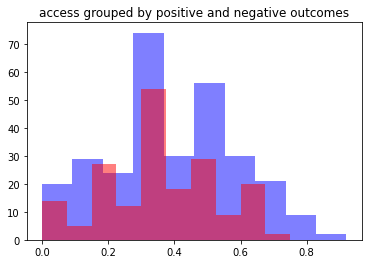

ShapiroResult(statistic=0.9751579761505127, pvalue=5.368967686081305e-05)
ShapiroResult(statistic=0.9599995017051697, pvalue=3.2067549909697846e-05)
KruskalResult(statistic=4.700198807186616, pvalue=0.030159128607082444)


In [60]:
plt.hist(positive_outcomes['access'], alpha=0.5, color = 'blue')
plt.hist(negative_outcomes['access'], alpha=0.5, color = 'red')
plt.title('access grouped by positive and negative outcomes')
plt.show()
print(stats.shapiro(positive_outcomes['access']))
print(stats.shapiro(negative_outcomes['access']))
print(stats.kruskal(positive_outcomes['access'], negative_outcomes['access']))